<center> <h1>Algoritmo del gradiente descendente con t fijo</h1> </center>

<h2>Definición</h2>
<h4>Es un algoritmo que utiliza la dirección del gradiente para encontrar
puntos óptimos de la función objetivo.</h4>

<h2>Ejercicio</h2>
<h4>Implemente el algoritmo para funciones bivariantes utilizando el
lenguaje de su preferencia y librerías matemáticas que incorporen
derivadas numéricas o el cálculo del gradiente.</h4>

<ol>
  <li>Dado un punto x en el dominio de $f(x)$ y un escalar $t$</li>
  <li>Repita mientras $||\nabla f(x_n)||_2 \geq \eta $
         <ul>
          <li>$\Delta x_n := -\nabla f(x_n)$</li>
          <li>$x_{n+1} := x_n + t \Delta x_n$</li>
      </ul> 
   </li>

</ol>

In [1]:
import sympy
from sympy import*

In [2]:
def functions(f: str):
    """
    If the input is a function, return it. Otherwise, convert it to a function

    :param f: the function to be integrated
    :type f: str
    :return: The function itself if it is a function, otherwise it is converted to a sympy function.
    """
    return f if isinstance(f, Function) else sympify(f)

In [3]:
def get_Symbols()->list:
    """
    It returns a list of two symbols, `x` and `y`
    :return: A list of two symbols, x and y.
    """
    return Symbol('x'), Symbol('y')

In [4]:
def get_Gradient(*args: any) -> list:
    """
    > The function `get_Gradient` takes in two arguments, `x` and `y`, and returns the gradient of the
    function `f` with respect to `x` and `y`
    
    :param : $
    :type : any
    :return: A Matrix of the partial derivatives of the function with respect to the variables.
    """
    if len(args) > 0: return Matrix([[diff(args[0], args[1])], [diff(args[0], args[2])]])

In [5]:
def get_Point(points: str) -> list:
    """
    It takes a string of comma separated numbers and returns a matrix of those numbers
    
    :param points: a string of comma-separated numbers ("x,y")
    :type points: str
    :return: A list of lists of floats.
    """
    return Matrix([ [float(point)] for point in points.split(',') ])

In [6]:
def desc_Gradient(point: list, gradient: list, t: float, n: float, *args:any) -> list:
    """
    The function takes in a point, a gradient, a step size, a tolerance, and a list of variables, and
    returns the point at which the gradient is less than the tolerance
    
    :param point: list, gradient: list, t: float, n: float, *args:any
    :type point: list
    :param gradient: the gradient of the function
    :type gradient: list
    :param t: step size
    :type t: float
    :param n: the norm of the gradient vector
    :type n: float
    :param : point is the starting point
    :type : any
    :return: The point at which the gradient is less than n.
    """
    ad = []
    gradient_vector = float(gradient.subs([(args[0], point[0]), (args[1], point[1])]).norm())
    while  gradient_vector >= n:
        gradient_vector = float(gradient.subs([(args[0], point[0]), (args[1], point[1])]).norm())
        delta_x_n = -1 * gradient.subs([(args[0], point[0]), (args[1], point[1])])
        point = point + t * (delta_x_n)
        ad.append(point)
    return ad

In [10]:
"""
    It takes a function, a point, a scalar, and a number, and returns the gradient descent of the
    function at the point with the scalar and number
    """
funcion = functions(str(input("Ingrese su función: ")))
punto = get_Point(str(input("Ingrese un Punto (x,y): ")))
print(punto)
n = float(input("Ingrese n (eta): "))
t = float(input("Ingrese escalar t: "))
x, y = get_Symbols()
gradient = get_Gradient(funcion, x, y)
desc = desc_Gradient(punto, gradient, t, n, x,y)
print(gradient)
print(desc)

Matrix([[2.00000000000000], [3.00000000000000]])
Matrix([[10*x + 8*y - 34], [8*x + 10*y - 38]])
[Matrix([
[1.0],
[2.2]]), Matrix([
[1.64],
[ 3.0]]), Matrix([
[  1.0],
[2.488]]), Matrix([
[1.4096],
[   3.0]]), Matrix([
[    1.0],
[2.67232]]), Matrix([
[1.262144],
[     3.0]]), Matrix([
[      1.0],
[2.7902848]]), Matrix([
[1.16777216],
[       3.0]]), Matrix([
[        1.0],
[2.865782272]]), Matrix([
[1.1073741824],
[         3.0]]), Matrix([
[          1.0],
[2.91410065408]]), Matrix([
[1.068719476736],
[           3.0]]), Matrix([
[            1.0],
[2.9450244186112]]), Matrix([
[1.04398046511104],
[             3.0]]), Matrix([
[             1.0],
[2.96481562791117]]), Matrix([
[1.02814749767107],
[             3.0]]), Matrix([
[             1.0],
[2.97748200186315]]), Matrix([
[1.01801439850948],
[             3.0]]), Matrix([
[             1.0],
[2.98558848119241]]), Matrix([
[1.01152921504607],
[             3.0]]), Matrix([
[             1.0],
[2.99077662796315]]), Matrix([
[1.00

In [11]:
import matplotlib.pyplot as plt
import numpy as np

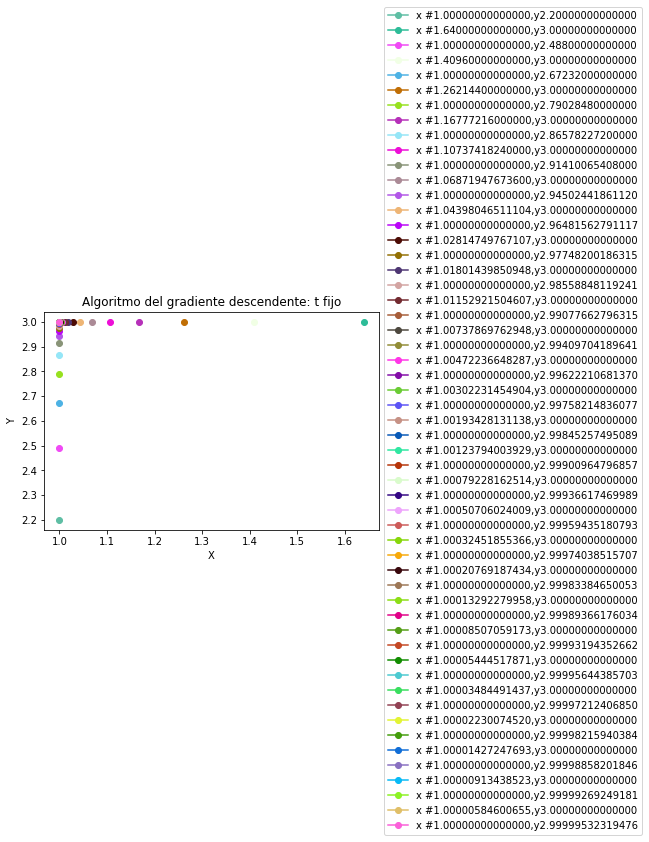

In [12]:
plt.title("Algoritmo del gradiente descendente: t fijo")
plt.xlabel("X")
plt.ylabel("Y")
for e in desc:
    plt.plot(e[0],e[1], color = np.random.rand(3, ), marker = "o", label = f"x #{e[0]},y{e[1]}")
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()